##Fine-tuning a deep learning model to classify images of different types of rice

Unzip and load data

In [ ]:
!7z x archive\ \(2\).zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 230059472 bytes (220 MiB)

Extracting archive: archive (2).zip
  5% 4096 Open              --
Path = archive (2).zip
Type = zip
Physical Size = 230059472
64-bit = +

  0%      1% 842 - Rice_Image_Dataset/Arborio/Arborio (10756).jpg                                                           1% 1287 - Rice_Image_Dataset/Arborio/Arborio (11156).jpg                                                            2% 1648 - Rice_Image_Dataset/Arborio/Arborio (11481).

Remove Jupyter Checkpoints(to avoid any issues when loading the data)

In [ ]:
!rm -r Rice/Training/.ipynb_checkpoints
!rm -r Rice/Testing/.ipynb_checkpoints
!rm -r Rice/.ipynb_checkpoints

Moving Data into Training and Testing Directories

In [ ]:
import os
import shutil
file_names = os.listdir('/content/Rice_Image_Dataset/Arborio')
for file_name in file_names[150:]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Arborio', file_name), '/content/Rice/Training/Arborio')

file_names = os.listdir('/content/Rice_Image_Dataset/Basmati')
for file_name in file_names[150:]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Basmati', file_name), '/content/Rice/Training/Basmati')

file_names = os.listdir('/content/Rice_Image_Dataset/Ipsala')
for file_name in file_names[150:]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Ipsala', file_name), '/content/Rice/Training/Ipsala')

file_names = os.listdir('/content/Rice_Image_Dataset/Jasmine')
for file_name in file_names[150:]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Jasmine', file_name),'/content/Rice/Training/Jasmine')

In [ ]:
file_names = os.listdir('/content/Rice_Image_Dataset/Karacadag')
for file_name in file_names[150:]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Karacadag', file_name),'/content/Rice/Training/Karacadag')

In [ ]:
file_names = os.listdir('/content/Rice_Image_Dataset/Arborio')
for file_name in file_names[:150]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Arborio', file_name), '/content/Rice/Testing/Arborio')

file_names = os.listdir('/content/Rice_Image_Dataset/Basmati')
for file_name in file_names[:150]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Basmati', file_name), '/content/Rice/Testing/Basmati')

file_names = os.listdir('/content/Rice_Image_Dataset/Ipsala')
for file_name in file_names[:150]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Ipsala', file_name), '/content/Rice/Testing/Ipsala')

file_names = os.listdir('/content/Rice_Image_Dataset/Jasmine')
for file_name in file_names[:150]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Jasmine', file_name),'/content/Rice/Testing/Jasmine')

file_names = os.listdir('/content/Rice_Image_Dataset/Karacadag')
for file_name in file_names[:150]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Karacadag', file_name),'/content/Rice/Testing/Karacadag')

In [ ]:
file_names = os.listdir('/content/Rice_Image_Dataset/Karacadag')
for file_name in file_names[:150]:
    shutil.move(os.path.join('/content/Rice_Image_Dataset/Karacadag', file_name),'/content/Rice/Testing/Karacadag')

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("Rice"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'Rice'.
There are 5 directories and 0 images in 'Rice/Training'.
There are 0 directories and 14700 images in 'Rice/Training/Basmati'.
There are 0 directories and 14700 images in 'Rice/Training/Ipsala'.
There are 0 directories and 14700 images in 'Rice/Training/Karacadag'.
There are 0 directories and 14700 images in 'Rice/Training/Arborio'.
There are 0 directories and 14700 images in 'Rice/Training/Jasmine'.
There are 5 directories and 0 images in 'Rice/Testing'.
There are 0 directories and 150 images in 'Rice/Testing/Basmati'.
There are 0 directories and 150 images in 'Rice/Testing/Ipsala'.
There are 0 directories and 150 images in 'Rice/Testing/Karacadag'.
There are 0 directories and 150 images in 'Rice/Testing/Arborio'.
There are 0 directories and 150 images in 'Rice/Testing/Jasmine'.
There are 0 directories and 0 images in 'Rice/.ipynb_checkpoints'.


In [ ]:
train_dir = 'Rice/Training/'
test_dir = 'Rice/Testing/'

Image Preprocessing

In [ ]:
import tensorflow as tf
IMG_SIZE = (180,180)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 73500 files belonging to 5 classes.
Found 750 files belonging to 5 classes.


In [ ]:
checkpoint_path = "Rice_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

Data Augmentation

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

Build Base Model (EfficientNetB0)

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=(180,180, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 180, 180, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                             

Model Compilation and Training (Feature Extraction)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history_rice = model.fit(train_data,
                                           epochs=5,
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)),
                                           callbacks=[checkpoint_callback])

Epoch 1/5
2297/2297 [==============================] - 425s 180ms/step - loss: 0.1022 - accuracy: 0.9721 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 2/5
2297/2297 [==============================] - 207s 90ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 3/5
2297/2297 [==============================] - 157s 68ms/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/5
2297/2297 [==============================] - 141s 61ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/5
2297/2297 [==============================] - 129s 56ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0020 - val_accuracy: 1.0000


In [ ]:
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

24/24 [==============================] - 2s 84ms/step - loss: 0.0220 - accuracy: 0.9947


[0.0219712033867836, 0.9946666955947876]

Plotting Loss Curves

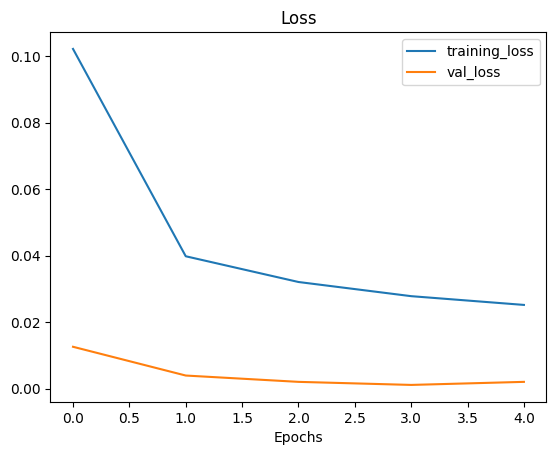

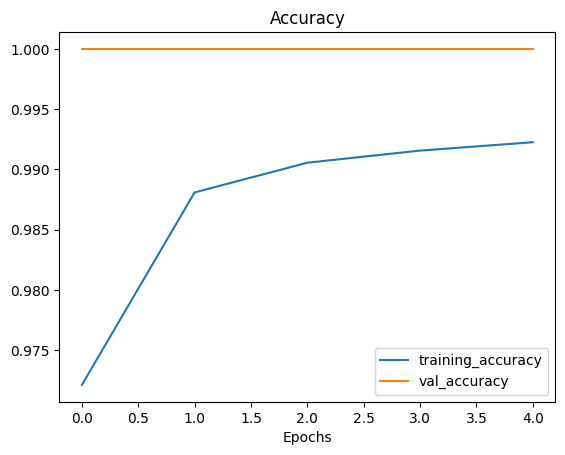

In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir
plot_loss_curves(history_rice)

Fine-Tuning the Model(Unfreezing the Base Model)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10

history_ricefinetune = model.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_rice.epoch[-1])

Epoch 5/10
2297/2297 [==============================] - 138s 56ms/step - loss: 0.0314 - accuracy: 0.9892 - val_loss: 2.6744e-04 - val_accuracy: 1.0000
Epoch 6/10
2297/2297 [==============================] - 127s 55ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/10
2297/2297 [==============================] - 125s 54ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 1.6132e-04 - val_accuracy: 1.0000
Epoch 8/10
2297/2297 [==============================] - 123s 53ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 4.9139e-05 - val_accuracy: 1.0000
Epoch 9/10
2297/2297 [==============================] - 121s 53ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 8.5833e-04 - val_accuracy: 1.0000
Epoch 10/10
2297/2297 [==============================] - 119s 52ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 2.5595e-05 - val_accuracy: 1.0000


In [ ]:
results_ricefinetune = model.evaluate(test_data)
results_ricefinetune

24/24 [==============================] - 1s 48ms/step - loss: 0.0403 - accuracy: 0.9880


[0.04026869684457779, 0.9879999756813049]

Comparison of Histories

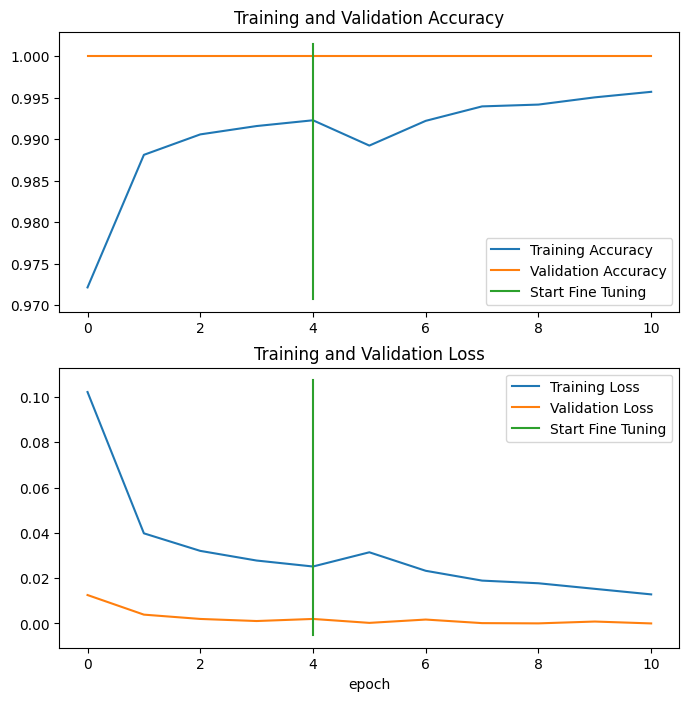

In [ ]:
compare_historys(original_history=history_rice,
                 new_history=history_ricefinetune,
                 initial_epochs=5)

In [ ]:
model.save("drive/My Drive/tensorflow_course/rice_model")